# 머신러닝 프레임워크 : sckit-learn
: 다양한 분류기를 지원하며, 검증하는 기능, 분류, 회귀, 클러스터링, 차원축소법이 가능하며 샘플데이터로 제공합니다.

In [246]:
# XOR 연산 학습해 보기
xor_input = [
    [0,0,0],
    [0,1,1],
    [1,0,1],
    [1,1,0]
]
xor_input

[[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]]

In [247]:
import pandas as pd

xor_df = pd.DataFrame(xor_input)
xor_data = xor_df.iloc[:, 0:2] # Feature Columns
xor_lable = xor_df.iloc[:, 2]  # Target Column
xor_lable

0    0
1    1
2    1
3    0
Name: 2, dtype: int64

In [248]:
# 데이터 학습과 예측하기
from sklearn import svm, metrics

clf = svm.SVC()
clf.fit(xor_data, xor_lable)
pred = clf.predict(xor_data)  # 공부한 내용으로 예측할때 사용
print(pred)

[0 1 1 0]


In [249]:
# 정답률 구하기
ac_score = metrics.accuracy_score(xor_lable, pred)
print('정답률 :', ac_score)

정답률 : 1.0


In [250]:
# 정답률 구하기 : predict를 구하지 않고 정답률 구하기
clf.score(xor_data, xor_lable)  # 과대 과소 적합 확인을 위해 트레이닝 데이터에 대한 정답률 계산

1.0

---

In [251]:
# 붗꽃의 품좀 분류하기
iris = pd.read_csv('../Data/iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [252]:
# 기본 통계량 확인
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [253]:
# NaN 확인하기
iris.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Name           0
dtype: int64

In [254]:
color = []
for name in iris['Name']:
    if name == 'Iris-setosa':
        color.append('red')
    elif name == 'Iris-versicolor':
        color.append('green')
    else :
        color.append('blue')
iris['Color'] = color

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Color
0,5.1,3.5,1.4,0.2,Iris-setosa,red
1,4.9,3.0,1.4,0.2,Iris-setosa,red
2,4.7,3.2,1.3,0.2,Iris-setosa,red
3,4.6,3.1,1.5,0.2,Iris-setosa,red
4,5.0,3.6,1.4,0.2,Iris-setosa,red


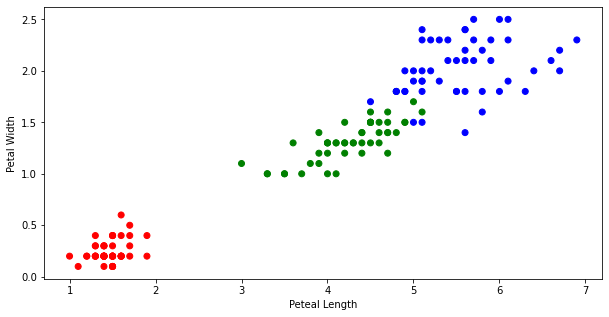

In [255]:
# Scatter 그리기
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.scatter(
    iris['PetalLength'],
    iris['PetalWidth'],
    c = iris['Color']
)
plt.xlabel('Peteal Length')
plt.ylabel('Petal Width')
plt.show()


In [256]:
# 머신러닝을 위한 작업
iris_data = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
iris_label = iris['Name']
print(iris_data)
print(iris_label)

     SepalLength  SepalWidth  PetalLength  PetalWidth
0            5.1         3.5          1.4         0.2
1            4.9         3.0          1.4         0.2
2            4.7         3.2          1.3         0.2
3            4.6         3.1          1.5         0.2
4            5.0         3.6          1.4         0.2
..           ...         ...          ...         ...
145          6.7         3.0          5.2         2.3
146          6.3         2.5          5.0         1.9
147          6.5         3.0          5.2         2.0
148          6.2         3.4          5.4         2.3
149          5.9         3.0          5.1         1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Name, Length: 150, dtype: object


In [257]:
# 학습용 데이터와 테스트용 데이터로 나누기
from sklearn.model_selection import train_test_split
train_data, test_data, tarain_label, test_label = train_test_split(iris_data, iris_label) # 받는 순서 주의
print(train_data.head())
print(test_data.head())
print("-"*10)
print(tarain_label.head())
print(test_label.head())

     SepalLength  SepalWidth  PetalLength  PetalWidth
56           6.3         3.3          4.7         1.6
74           6.4         2.9          4.3         1.3
19           5.1         3.8          1.5         0.3
100          6.3         3.3          6.0         2.5
145          6.7         3.0          5.2         2.3
     SepalLength  SepalWidth  PetalLength  PetalWidth
123          6.3         2.7          4.9         1.8
65           6.7         3.1          4.4         1.4
88           5.6         3.0          4.1         1.3
106          4.9         2.5          4.5         1.7
8            4.4         2.9          1.4         0.2
----------
56     Iris-versicolor
74     Iris-versicolor
19         Iris-setosa
100     Iris-virginica
145     Iris-virginica
Name: Name, dtype: object
123     Iris-virginica
65     Iris-versicolor
88     Iris-versicolor
106     Iris-virginica
8          Iris-setosa
Name: Name, dtype: object


In [258]:
# 학습 시키기
clf = svm.SVC()
clf.fit(train_data, tarain_label)

SVC()

In [259]:
# 예측하기
pred = clf.predict(test_data)
print(pred[0:5])

['Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa']


In [260]:
# 정답률
ac_score = metrics.accuracy_score(test_label, pred)
print('정답률 :', ac_score)

정답률 : 0.9736842105263158


In [261]:
# Training 정답률
clf.score(train_data, tarain_label)

0.9732142857142857

In [262]:
# Test 정답률
clf.score(test_data, test_label)

0.9736842105263158

In [263]:
# 분류 Report() : Confusion matrix
cl_report = metrics.classification_report(test_label, pred)
print(cl_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [274]:
[4.1, 3.5, 1.4, 0.2]
clf.predict([[4.1, 3.5, 1.4, 0.2]])


array(['Iris-setosa'], dtype=object)